In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [83]:
Mush=pd.read_csv('Mushroom.csv')

In [3]:
Mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


The Mushroom dataset is called as Mush

In [4]:
Mush.shape

(8124, 23)

Mush has 8124 rows and 23 columns

In [5]:
Mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Top 5 rows of Mush dataset

In [6]:
Mush.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


Last 5 rows of Mush dataset

In [7]:
Mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Mush dataset is of objet datatype and there are no null values 

In [8]:
Mush.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No null values are present in the Mush dataset

In [9]:
Mush.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

Columns in Mush dataset

In [10]:
Mush['class'].unique()

array(['p', 'e'], dtype=object)

The class is label in this dataset.

In [11]:
Mush['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

There are 3916 poisonous and 4208 edible

From this we can understand this is categorical dataset.

we need to convert the data set into numerical as whole dataset is in string format, to make it run in models.

In [12]:
Mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


#### Label Encoder

In [13]:
cols=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [14]:
Mush[cols]=Mush[cols].apply(LabelEncoder().fit_transform)

Label encoder is used to convert the multiple columns into numerical.

In [15]:
Mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


We can see our whole dataset is converted from string to numerical

#### Correlation

In [16]:
Mush.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


1) Mean is high than median in class,gill-attachmnet,veli-color,population,cap-surface
2) Outliers present in habitat as there is huge difference between 75% and 100%

#### Correlation

<AxesSubplot:>

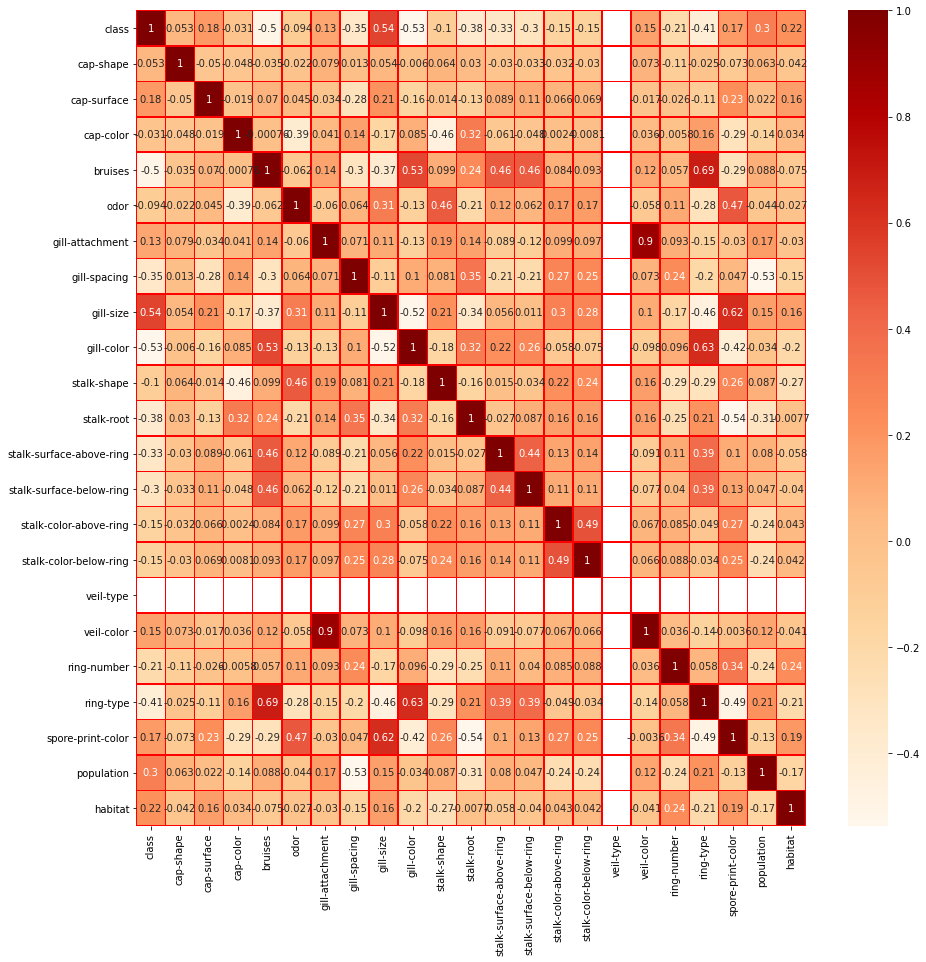

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(Mush.corr(),annot=True,cmap='OrRd',linewidth=.5,linecolor='Red')

### EDA

#### univariative analysis

In [18]:
ncols,nrows=(3,8)
CN=Mush.columns.values
CN

array(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
       'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'], dtype=object)

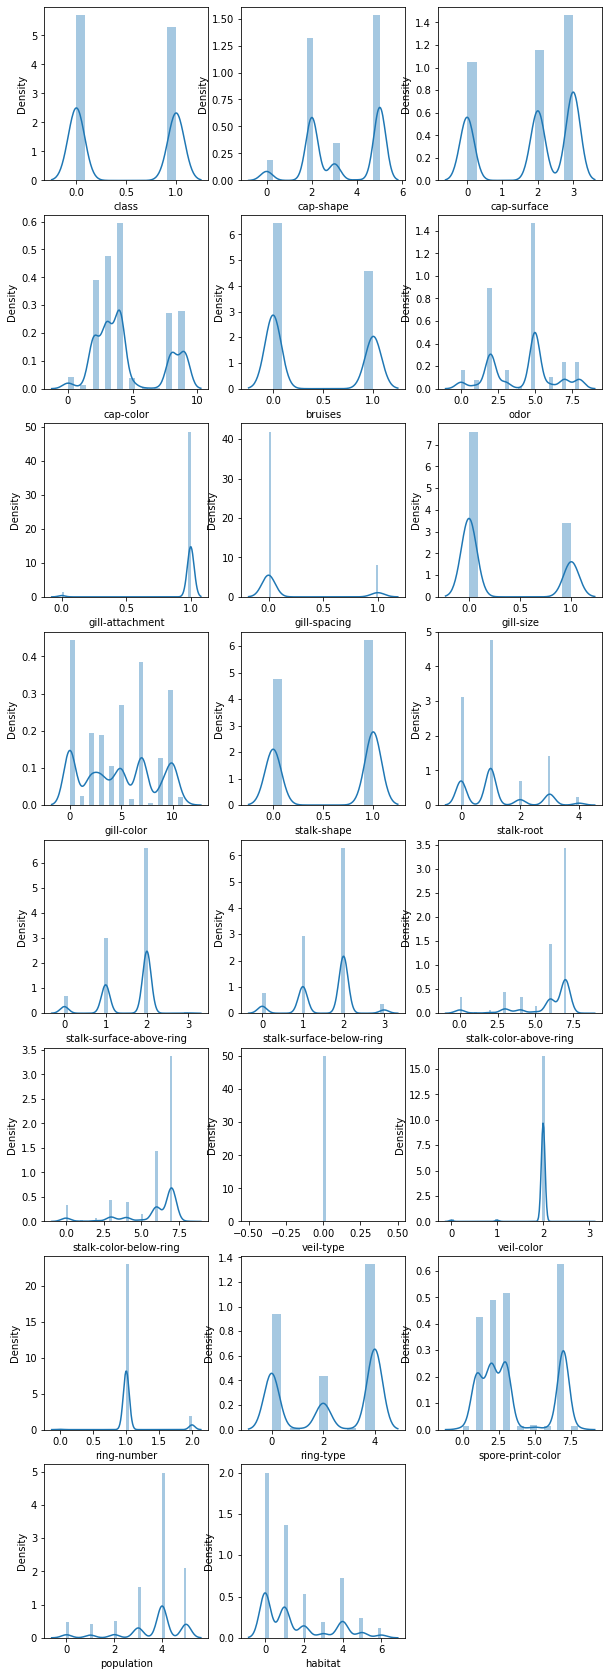

In [19]:
plt.figure(figsize=(10,30))
for index,col in enumerate(CN):
    plt.subplot(nrows,ncols,index+1)
    sns.distplot(Mush[CN[index]])

From above chart we can see Density is normally distrbuted

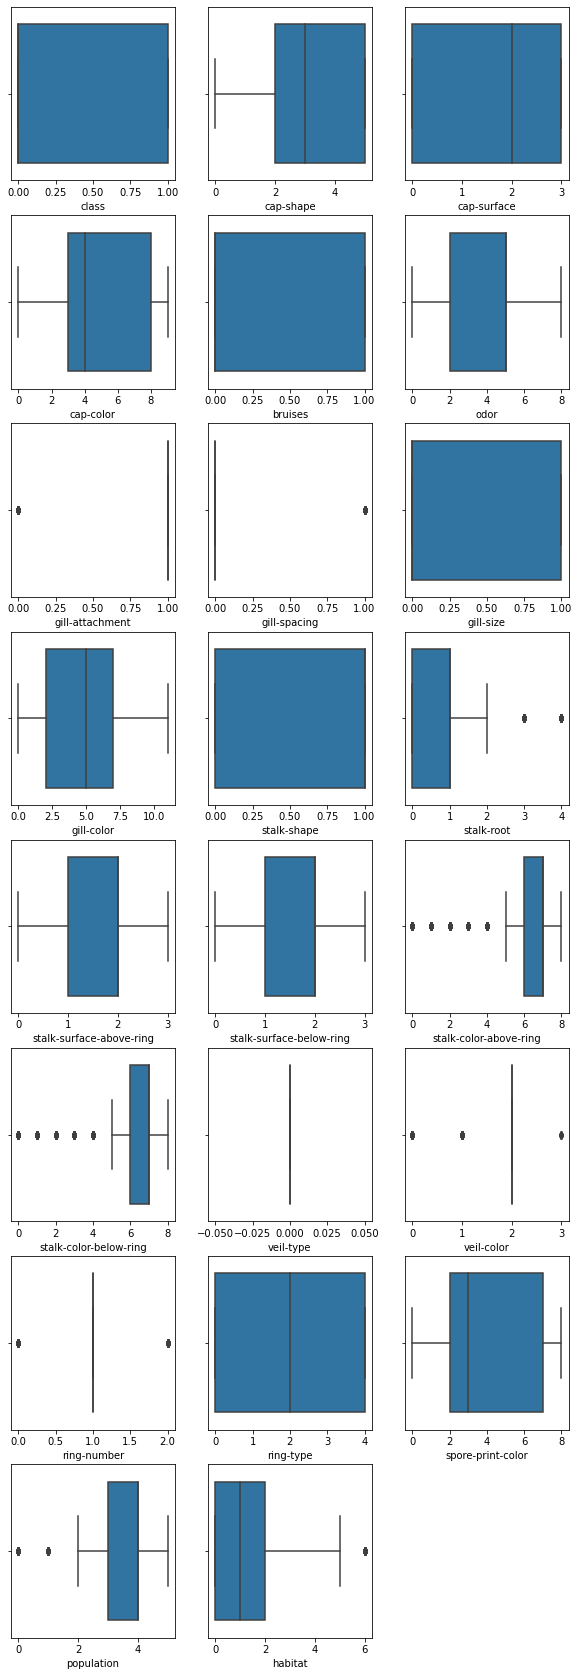

In [20]:
plt.figure(figsize=(10,30))

for index,col in enumerate(CN):
    plt.subplot(nrows,ncols,index+1)
    sns.boxplot(Mush[CN[index]])

There are lot of outliers present in columns: habitat,population,ring-number,veli-color,st5alk-colo-belo-ring,stalk-color-above-ring,stalk-root,gillspacing,gill-attachmnet

#### Bivariative analysis

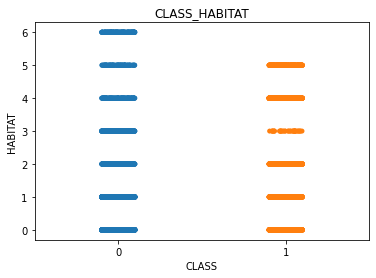

In [21]:
sns.stripplot(Mush['class'],Mush['habitat'])
plt.xlabel('CLASS')
plt.ylabel('HABITAT')
plt.title("CLASS_HABITAT")
plt.show()

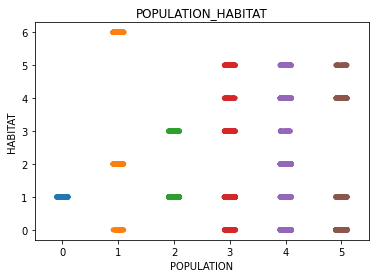

In [22]:
sns.stripplot(Mush['population'],Mush['habitat'])
plt.xlabel('POPULATION')
plt.ylabel('HABITAT')
plt.title("POPULATION_HABITAT")
plt.show()

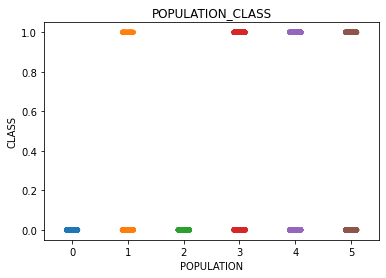

In [23]:
sns.stripplot(Mush['population'],Mush['class'])
plt.xlabel('POPULATION')
plt.ylabel('CLASS')
plt.title("POPULATION_CLASS")
plt.show()

<AxesSubplot:xlabel='class', ylabel='count'>

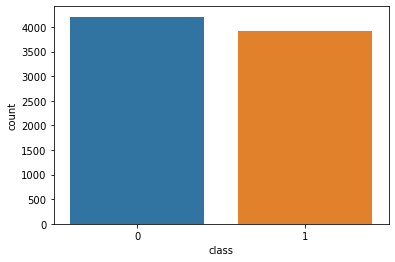

In [24]:
sns.countplot(Mush['class'])

There are more edible mushrooms in dataset then poisonous

Text(0.5, 1.0, 'Scatter plot for class and gill color')

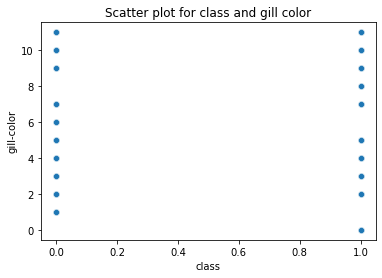

In [25]:
sns.scatterplot(Mush['class'],Mush['gill-color'])
plt.title('Scatter plot for class and gill color')

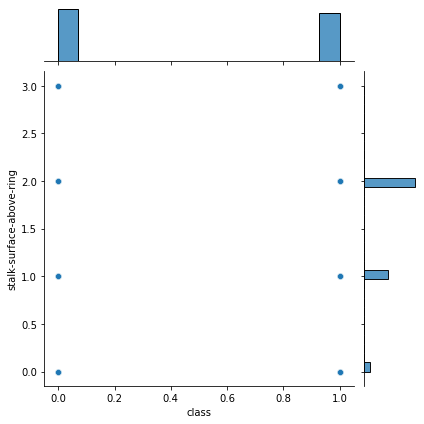

In [26]:
sns.jointplot(Mush['class'],Mush['stalk-surface-above-ring'])
plt.show()

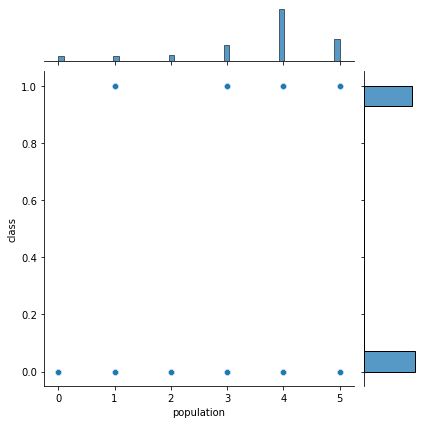

In [27]:
sns.jointplot(Mush['population'],Mush['class'])

#### Multivariative analysis

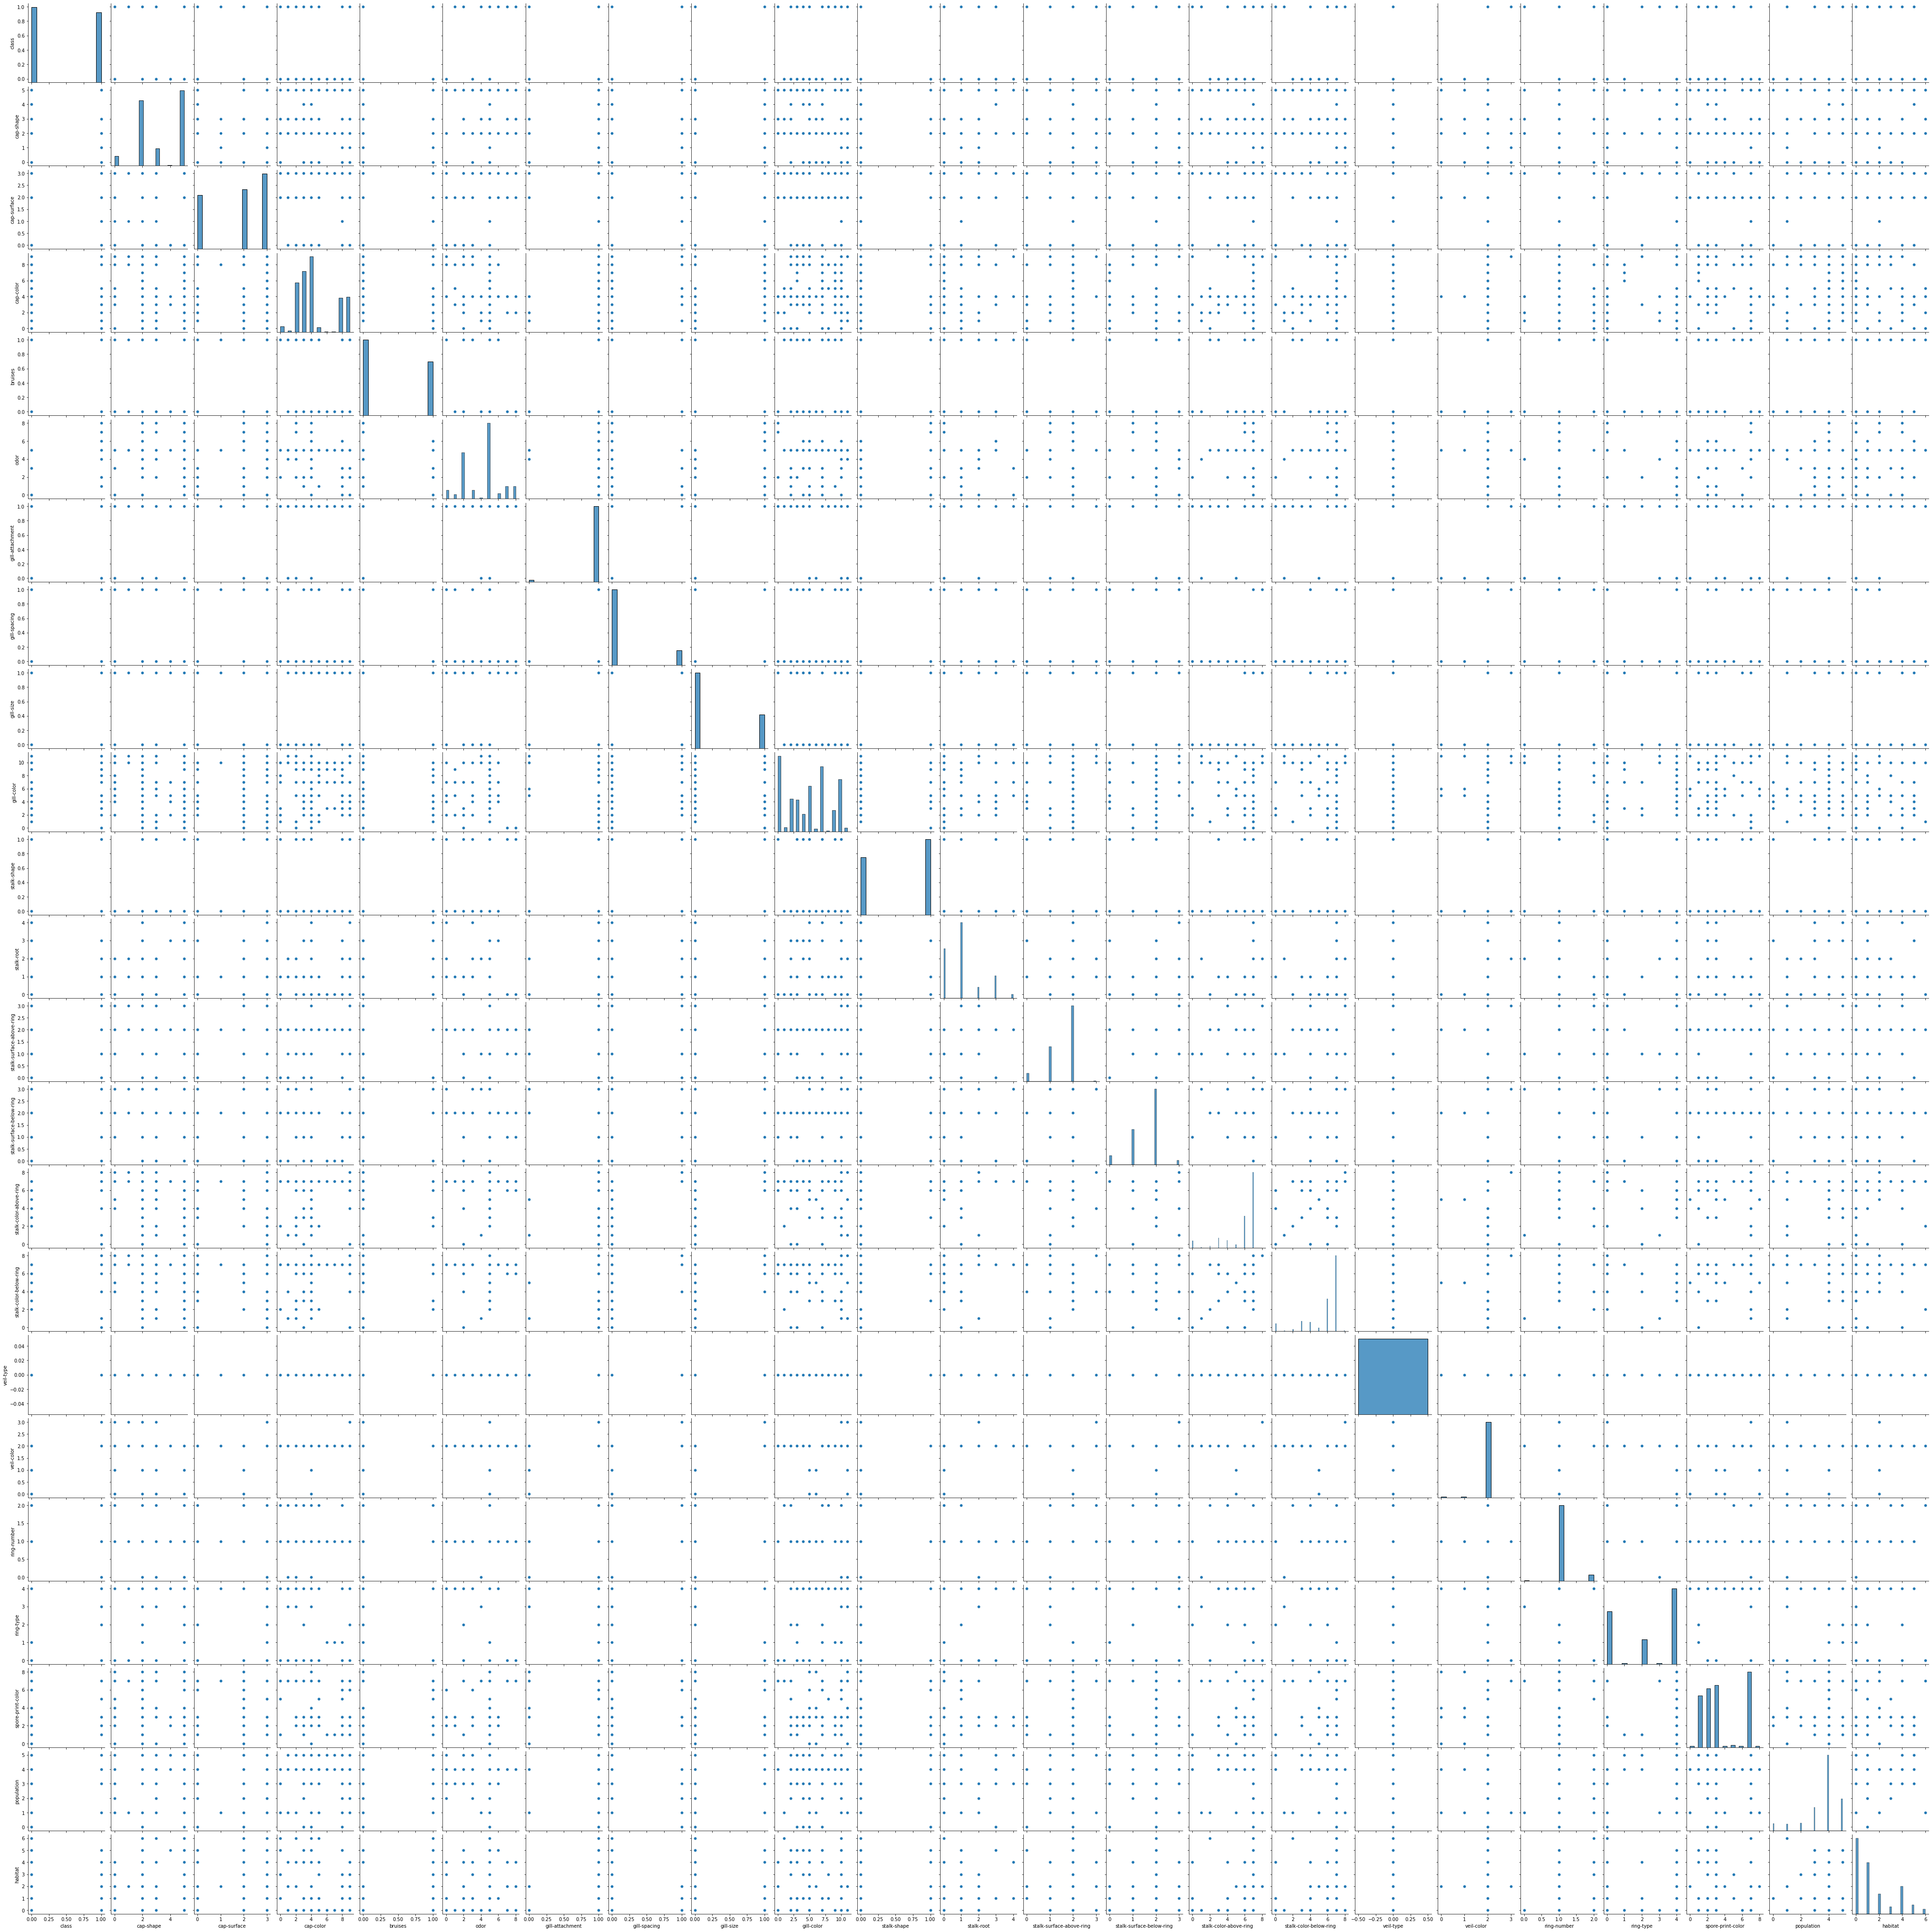

In [28]:
sns.pairplot(Mush)

#### Zscore

In [29]:
z=np.abs(zscore(Mush))

In [30]:
z

array([[1.0366127 , 1.02971224, 0.14012794, ..., 0.67019486, 0.5143892 ,
        2.03002809],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.29572966],
       [0.96468045, 2.08704716, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.86714922],
       ...,
       [0.96468045, 0.8403434 , 0.14012794, ..., 1.50964337, 2.11182722,
        0.28570978],
       [1.0366127 , 0.21699152, 0.95327039, ..., 1.42842641, 0.28432981,
        0.28570978],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.16925365, 2.11182722,
        0.28570978]])

These are the zscore values of Mush dataset

In [31]:
threshold=3
print(np.where(z>3))

(array([1816, 2128, 2128, ..., 8121, 8123, 8123], dtype=int64), array([15, 14, 15, ..., 17,  6, 17], dtype=int64))


This is arrays where columns and rows are listed having zscore value more than 3.

In [32]:
MUSHROOM=Mush[(z<3).all (axis=1)]

In [33]:
MUSHROOM

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


After removing the outliers from the dataset all columns are getting deleted , hence we are not going to remove the outliers.

In [34]:
Mush=pd.read_csv('Mushroom.csv')

In [35]:
Mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [37]:
Mush[cols]=Mush[cols].apply(LabelEncoder().fit_transform)

In [38]:
Mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


### Skewness

In [39]:
Mush.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

Skewness is there im cap color,gill attachmnet,gill spacing,stalk surface above ring,stalk color above below ring,stalk color above ring,veli color,veli number,population,habitat

In [42]:
x=Mush.iloc[:,1:23]

In [43]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [44]:
y=Mush.iloc[:,0:1]

In [45]:
y

,class
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


In [48]:
for i in x.columns:
    if x[i].skew()>0.5:
        x[i]=np.cbrt(x[i])
    if x[i].skew()<0.5:
        x[i]=np.cbrt(x[i])
        
x.skew()        

cap-shape                   -2.280633
cap-surface                 -0.899410
cap-color                   -5.280912
bruises                      0.342750
odor                        -2.045857
gill-attachment             -5.977076
gill-spacing                 1.840088
gill-size                    0.825797
gill-color                  -0.984513
stalk-shape                 -0.271345
stalk-root                  -0.811852
stalk-surface-above-ring    -2.701225
stalk-surface-below-ring    -2.528337
stalk-color-above-ring      -3.248021
stalk-color-below-ring      -3.234003
veil-type                    0.000000
veil-color                  -8.523557
ring-number                -12.864861
ring-type                   -0.588429
spore-print-color           -4.313718
population                  -3.174065
habitat                     -0.419093
dtype: float64

<AxesSubplot:xlabel='ring-number', ylabel='Density'>

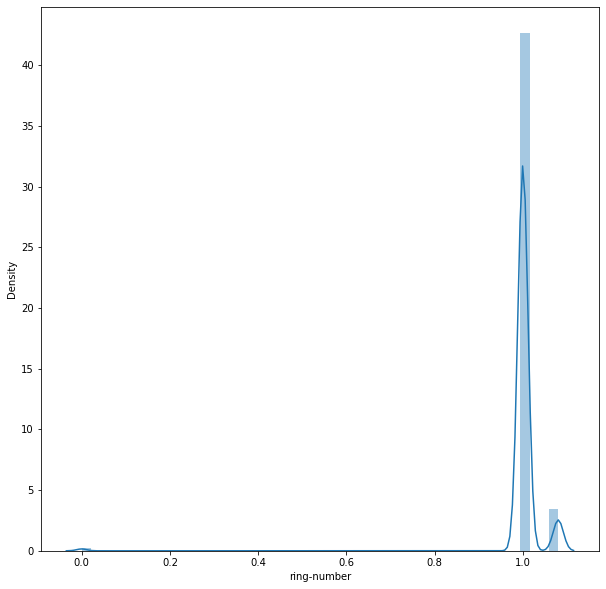

In [50]:
plt.figure(figsize=(10,10))
sns.distplot(x['ring-number'])

<AxesSubplot:xlabel='veil-color', ylabel='Density'>

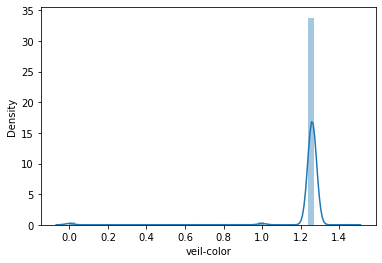

In [52]:
sns.distplot(x['veil-color'])

<AxesSubplot:xlabel='veil-color', ylabel='Density'>

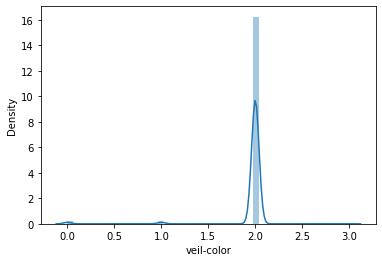

In [53]:
sns.distplot(Mush['veil-color'])

<AxesSubplot:xlabel='ring-number', ylabel='Density'>

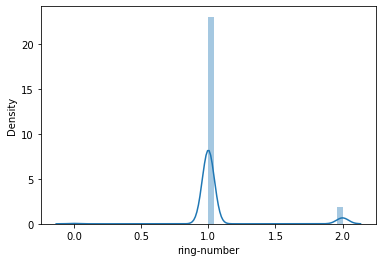

In [55]:
sns.distplot(Mush['ring-number'])

### Model

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=43)

aplling train test split method

In [57]:
x_train.shape

(5686, 22)

In [58]:
y_train.shape

(5686, 1)

In [59]:
x_test.shape

(2438, 22)

In [60]:
y_test.shape

(2438, 1)

This is classification problem so we can use Logistic regression,DTC,SVM,Knn methods

In [68]:
LG=LogisticRegression()
DTC=DecisionTreeClassifier()
KNN=KNeighborsClassifier(n_neighbors=5)
svc=SVC(kernel='rbf')
GB=GaussianNB()

In [81]:
model=[LG,DTC,KNN,svc,GB]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print('The model is:',m)
    print('Accuracy score:',accuracy_score(y_test,pred))
    print('confusion matrix',confusion_matrix(y_test,pred))
    print('classification report',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(m,x,y,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean())
    print('Best score:',(accuracy_score(y_test,pred)-(score.mean())))
    print('\n')

The model is: LogisticRegression()
Accuracy score: 0.9474979491386383
confusion matrix [[1180   53]
 [  75 1130]]
classification report               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1233
           1       0.96      0.94      0.95      1205

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



cross validation score
cross val score [0.79446154 0.95753846 0.81969231 0.99876923 0.50246305]
cross val score mean: 0.8145849185297461
Best score: 0.13291303060889215


The model is: DecisionTreeClassifier()
Accuracy score: 1.0
confusion matrix [[1233    0]
 [   0 1205]]
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1233
           1       1.00      1.00      1.00      1205

    accuracy                           1.00      2438
   macro avg       1.

##### DecisionTreeClassifier gives us the best accuracy score . 92%

#### JOBLIB

In [84]:
joblib.dump(DTC,'Mush.obj')

['Mush.obj']